##### 1. Откройте датасет и проведите обработку данных

In [6]:
import pandas as pd

data = pd.read_csv('train.csv').dropna()

X = data.drop(['PassengerId', 'Name', 'Transported'], axis=1)
y = data['Transported'].astype(int)

# Проведите обработку категориальных данных
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
encoded_cols = pd.get_dummies(X[categorical_cols])

X = pd.concat([X.drop(categorical_cols, axis=1), encoded_cols], axis=1)

# Проведите нормализацию числовых данных
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/3/P,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True,...,False,False,False,False,False,False,False,True,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,True,...,False,False,False,False,False,False,False,True,False,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,True,...,False,False,False,False,False,False,False,True,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False


##### 2. Постройте дерево решений. Вычислите метрики: accuracy, f1

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")

Accuracy: 0.7927382753403933
F1-score: 0.8002915451895044


##### 3. Примените метод случайного леса. Вычислите значимость переменных.

In [8]:
rdm = RandomForestClassifier(n_estimators=100, random_state=42)
rdm.fit(X_train, y_train)

importances = rdm.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

CryoSleep_False    0.070579
Spa                0.068398
RoomService        0.061587
Age                0.061056
VRDeck             0.060028
                     ...   
Cabin_F/1086/P     0.000000
Cabin_G/15/S       0.000000
Cabin_F/1087/S     0.000000
Cabin_F/1088/S     0.000000
Cabin_E/53/P       0.000000
Length: 5321, dtype: float64


##### 4.1 Визуализируйте зависимость качества решения от числа деревьев для случайного леса.

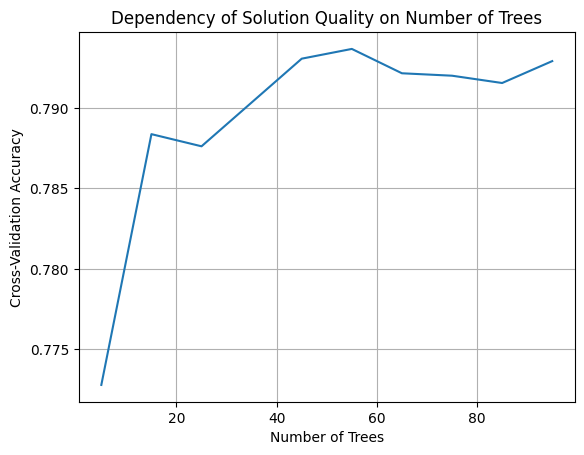

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
n_estimators_range = np.arange(5, 100, 10)  # Лучший результат - 55 деревьев
cv_scores = []
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
plt.plot(n_estimators_range, cv_scores)
plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Dependency of Solution Quality on Number of Trees')
plt.grid(True)
plt.show()

##### 4.2 Постройте несколько зависимостей качества решения от числа деревьев для разной глубины дерева.

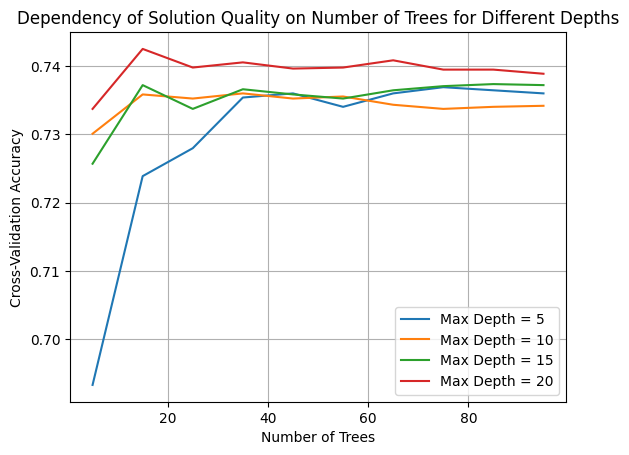

In [12]:
n_estimators_range = np.arange(5, 100, 10)  # From 10 to 200 trees with step 10
max_depth_values = [5, 10, 15, 20]  # Different tree depths to consider
for max_depth in max_depth_values:
    cv_scores = []
    for n_estimators in n_estimators_range:
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())

    plt.plot(n_estimators_range, cv_scores, label=f'Max Depth = {max_depth}')

plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Dependency of Solution Quality on Number of Trees for Different Depths')
plt.legend()
plt.grid(True)
plt.show()

##### 5. Выполните пункт 4.2 для градиентого бустинга.

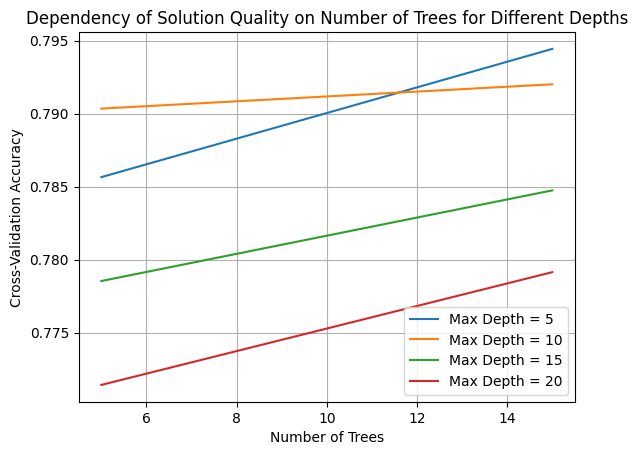

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
n_estimators_range = np.arange(5, 25, 10)
max_depth_values = [5, 10, 15, 20]
for max_depth in max_depth_values:
    cv_scores = []
    for n_estimators in n_estimators_range:
        rf_classifier = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())

    plt.plot(n_estimators_range, cv_scores, label=f'Max Depth = {max_depth}')

plt.xlabel('Number of Trees')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Dependency of Solution Quality on Number of Trees for Different Depths')
plt.legend()
plt.grid(True)
plt.show()